In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_sales = pd.read_csv('../data/clean_step2.csv')

In [3]:
df_sales.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,...,markup,week_number,month,unit_revenue,unit_price,unit_pis_cofins,unit_icms,unit_tax_substitution,unit_liquid_cost,unit_markup
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.803737,23,6,436.1935,978.90,90.5483,0.000,191.8416,542.7065,0.803737
1,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.803737,23,6,436.1935,978.90,90.5483,0.000,191.8416,542.7065,0.803737
2,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.798486,24,6,433.3435,976.05,90.2846,0.000,192.3325,542.7065,0.798486
3,a8ad36828898fa3f6efeb5bd19c076f2,e6762ba2ffbca07ab6cee7551caeaad5,1,1089.10,100.7418,185.147,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,1.006794,24,6,546.3935,1089.10,100.7418,185.147,0.0000,542.7065,1.006794
4,9cbfaac6e04ea6ed454b843c94f2c29c,e6762ba2ffbca07ab6cee7551caeaad5,1,949.00,87.7825,170.820,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.748643,24,6,406.2935,949.00,87.7825,170.820,0.0000,542.7065,0.748643


In [4]:
df_sales.describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999])

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,revenue,markup,week_number,month,unit_revenue,unit_price,unit_pis_cofins,unit_icms,unit_tax_substitution,unit_liquid_cost,unit_markup
count,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000
mean,1.050653,233.439841,19.446323,24.590919,18.274328,135.678992,97.760848,0.805955,25.741002,6.385391,90.545141,224.271591,18.750057,23.604269,18.029388,133.726450,0.738683
std,0.405702,154.475453,15.034110,29.380116,28.044705,81.685219,102.029945,0.754525,15.982790,3.636626,54.681284,126.387220,12.762771,26.604175,27.858986,82.225024,0.301408
min,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,-66.483700,-0.289836,0.000000,1.000000,-66.483700,6.910000,0.000000,0.000000,0.000000,1.612530,-0.289836
0.01%,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,-4.614900,-0.028274,0.000000,1.000000,-4.614900,6.910000,0.000000,0.000000,0.000000,4.114100,-0.028274
25%,1.000000,149.410000,10.430300,0.000000,0.000000,76.865400,55.375100,0.545132,12.000000,3.000000,54.795300,146.475000,10.119500,0.000000,0.000000,75.957600,0.545132
50%,1.000000,194.800000,17.519500,19.880000,0.000000,117.082000,79.323500,0.696978,24.000000,6.000000,78.584500,191.280000,17.464000,19.521000,0.000000,116.627300,0.696943
75%,1.000000,309.900000,28.618600,38.860200,30.861200,205.899700,115.971800,0.897382,41.000000,10.000000,113.653800,305.875000,28.110800,37.882000,30.403700,205.899700,0.897382
90%,1.000000,359.910000,33.244500,61.098000,69.057300,213.438200,155.961800,1.110051,47.000000,11.000000,150.961800,359.400000,33.148300,59.982000,68.936400,213.438200,1.083155
99%,2.000000,820.567000,70.280660,131.220000,100.815700,496.929700,421.293500,3.125190,52.000000,12.000000,291.205000,766.176000,63.344900,98.942760,96.924900,496.929700,1.788443


## Verify the distributions

In [5]:
def summary_dist(target_col, base_col='order_id', method='count'):
    if method == 'count':
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.nunique}).reset_index()
    else:
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.sum}).reset_index()
    df_summary[base_col] = df_summary[base_col] / df_summary[base_col].sum()  * 100
    return df_summary.sort_values(base_col).tail(25)

In [6]:
df_orders_product = summary_dist('code')
df_orders_product

,code,order_id
64,5e4c14883e5a606fac56b2630da5dca7,0.771777
46,4557c7e5af70efd2e3ca2befd59ccdc3,0.807014
89,a2018dae10d736a66eea5a0a349ef9ee,0.815306
103,c254dc11afbcc091678f0ab49a02e7ad,0.858144
73,6c82ad0e791258434fd42c51409b0239,0.875417
5,0f38be2df6854b4374f06cae1bc38482,0.952111
39,40bddb00475d65eddb68e9aeb6fab0de,0.997713
121,e13f7f001fe2b1af072a3d50d3058284,1.080625
81,7da116bd1d42f3475803402e710253cf,1.162156
63,5e39201e582b1bb89cae7f650e4330c8,1.238850


In [7]:
df_orders_product.tail(10).sum()

code        d5bc9e14d090330cd07e6ccbcb3c3e4e760693745e10b0...
order_id                                              50.9069
dtype: object

* It is interesting to see that 50% of the orders are from 10 Products 

In [8]:
df_product_quantity = summary_dist('code', base_col='quantity', method='sum')
df_product_quantity

,code,quantity
64,5e4c14883e5a606fac56b2630da5dca7,0.756928
46,4557c7e5af70efd2e3ca2befd59ccdc3,0.781260
89,a2018dae10d736a66eea5a0a349ef9ee,0.806908
73,6c82ad0e791258434fd42c51409b0239,0.843077
5,0f38be2df6854b4374f06cae1bc38482,0.941721
103,c254dc11afbcc091678f0ab49a02e7ad,0.967369
39,40bddb00475d65eddb68e9aeb6fab0de,0.977891
121,e13f7f001fe2b1af072a3d50d3058284,1.087057
81,7da116bd1d42f3475803402e710253cf,1.135721
63,5e39201e582b1bb89cae7f650e4330c8,1.350765


In [9]:
df_product_quantity.tail(10).sum()

code        d5bc9e14d090330cd07e6ccbcb3c3e4e760693745e10b0...
quantity                                               50.701
dtype: object

* It is interesting to see that also 50% of  the quantity are from 10 Products 

In [10]:
df_product_revenue = summary_dist('code', base_col='revenue', method='sum')
df_product_revenue

,code,revenue
9,193628b6634713730d3c506f2da0ff58,0.814967
31,37e2a39e829495d13b6cbb5320413e48,0.837144
119,dd1935ffd0ee2b6ec159ba7867d11e57,0.905170
50,4ceedf57303e127d31a164c7ae5791d8,0.996237
5,0f38be2df6854b4374f06cae1bc38482,1.003183
93,abf2d3cb446492ee7897087db9a0b2a0,1.123538
46,4557c7e5af70efd2e3ca2befd59ccdc3,1.136976
81,7da116bd1d42f3475803402e710253cf,1.139122
12,1c234775cae774823f38abe6721e61a4,1.296057
82,7e3713530b46887cff58a2e2ac433ac5,1.308157


In [11]:
df_product_revenue.tail(10).sum()

code       b08b7321c4db8f45a1a97a79d1e44dd8d5bc9e14d09033...
revenue                                              52.9444
dtype: object

* Now when we have that 3 products represent 30% of the revenue ?

## Deep dive on products

In [12]:
top_5_orders = df_orders_product.tail(5).code.values
top_5_product_revenue = df_product_revenue.tail(5).code.values
top_5_product_quantity = df_product_quantity.tail(5).code.values

selected_products = list(set(list(top_5_orders)+ list(top_5_product_revenue)+ list(top_5_product_quantity)))
selected_products

['2e35421c34fb588ba40a0c57b3971d24',
 '3454ea52396a4cfd3fc37414d30c7b9c',
 '23056d85a1c9115cd021a6ad35c84aff',
 '760693745e10b0c5e68c42214c729b0d',
 '32ceebf3efea1d04ace4183d20d4da5b',
 '4534ea61b50410b3b6243e02b40c8cd1']

In [13]:
df_filtered_sales = df_sales[df_sales.code.isin(selected_products)]
df_filtered_sales.groupby('code').describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999]).T

code                23056d85a1c9115cd021a6ad35c84aff  \
quantity    count                        5146.000000   
            mean                            1.024291   
            std                             0.187025   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
unit_markup 75%                             0.835234   
            90%                             1.017968   
            99%                             1.212056   
            99.99%                          2.250191   
            max                             2.332041   

code                2e35421c34fb588ba40a0c57b3971d24  \
quantity    count                       18026.000000   
            mean                            1.035893   
            std                             0.242248   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
unit_markup 75%                             0.683860   
            90%                             0.730712   
            99%                             1.147338   
            99.99%                          1.620357   
            max                             1.874368   

code                32ceebf3efea1d04ace4183d20d4da5b  \
quantity    count                        7491.000000   
            mean                            1.019223   
            std                             0.159786   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
unit_markup 75%                             0.745510   
            90%                             0.891212   
            99%                             1.247546   
            99.99%                          1.768996   
            max                             1.925453   

code                3454ea52396a4cfd3fc37414d30c7b9c  \
quantity    count                        7509.000000   
            mean                            1.050073   
            std                             0.523702   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
unit_markup 75%                             0.980149   
            90%                             1.055705   
            99%                             1.534800   
            99.99%                          2.242087   
            max                             2.443478   

code                4534ea61b50410b3b6243e02b40c8cd1  \
quantity    count                       14205.000000   
            mean                            1.087504   
            std                             0.523742   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
unit_markup 75%                             0.620079   
            90%                             0.755553   
            99%                             1.210200   
            99.99%                          1.688501   
            max                             1.931723   

code                760693745e10b0c5e68c42214c729b0d  
quantity    count                        3980.000000  
            mean                            1.034673  
            std                             0.247234  
            min                             1.000000  
            0.01%                           1.000000  
...                                              ...  
unit_markup 75%                             0.700342  
            90%                             0.889269  
            99%                             1.270375  
            99.99%                          1.753740  
            max               

* The products are selling in orders with 1 quantity 90% of the time.
* The price deviation on 3454ea52396a4cfd3fc37414d30c7b9c and 4534ea61b50410b3b6243e02b40c8cd1 when compared to its means have a higher value than its pairs. 
* The product 4534ea61b50410b3b6243e02b40c8cd1 doesn't have to pay pis/cofins. 
* 75% of the sales for 760693745e10b0c5e68c42214c729b0d doens't do tax substitution.
* The product costs doesn't change?
* There were some sales with negative revenue (losses) 4534ea61b50410b3b6243e02b40c8cd1 and 2e35421c34fb588ba40a0c57b3971d24. 


## Sensibilty

AttributeError: 'PairGrid' object has no attribute 'tick_params'

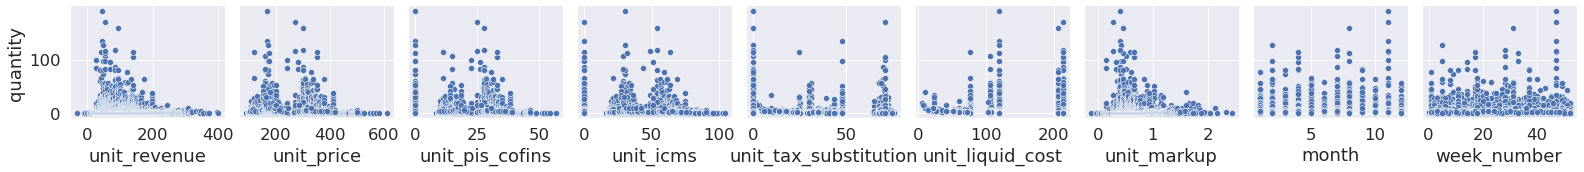

In [19]:
unit_cols = [c for c in df_filtered_sales.columns if 'unit' in c] + ['month', 'week_number']
df = df_filtered_sales[ unit_cols + ['quantity']].groupby(unit_cols).agg({'quantity':'sum'}).reset_index()

ax = sns.pairplot(df, 
            y_vars=['quantity'], x_vars=unit_cols)
ax.tick_params(axis='y', labelleft=True) 

2e35421c34fb588ba40a0c57b3971d24


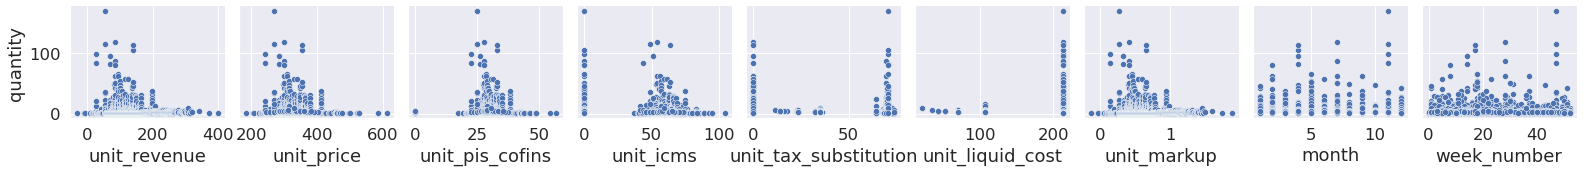

3454ea52396a4cfd3fc37414d30c7b9c


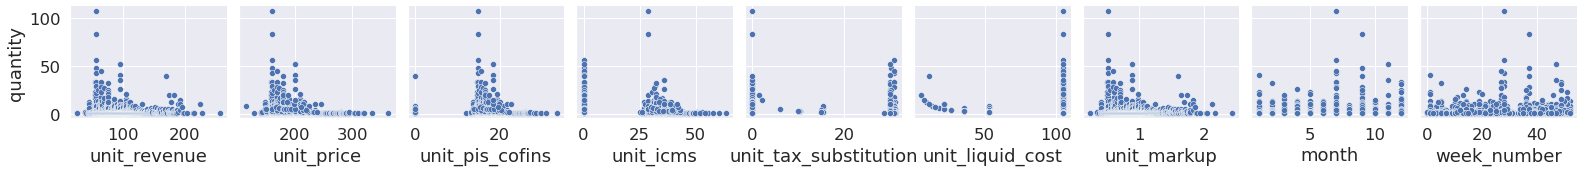

23056d85a1c9115cd021a6ad35c84aff


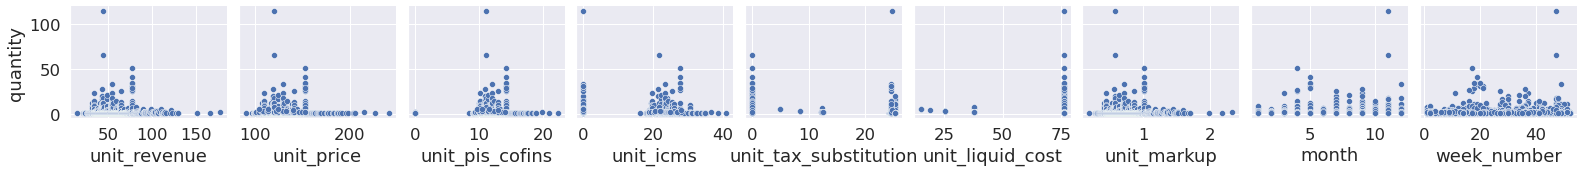

760693745e10b0c5e68c42214c729b0d


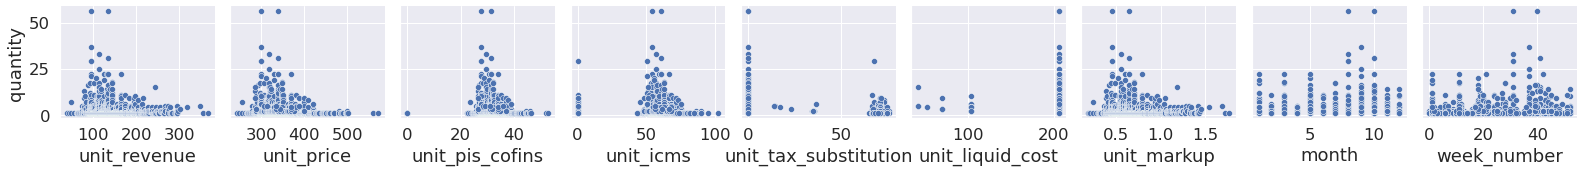

32ceebf3efea1d04ace4183d20d4da5b


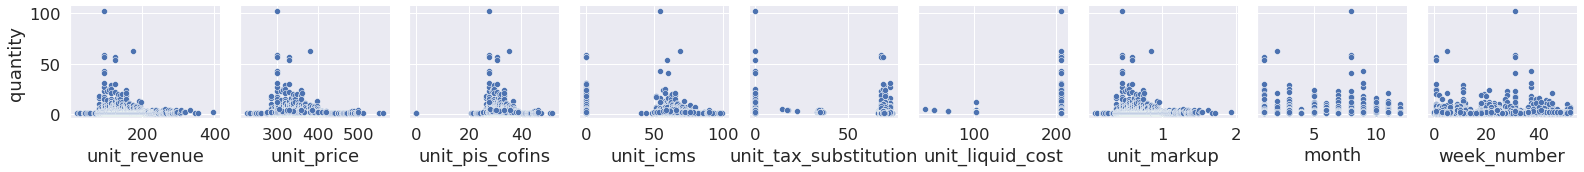

4534ea61b50410b3b6243e02b40c8cd1


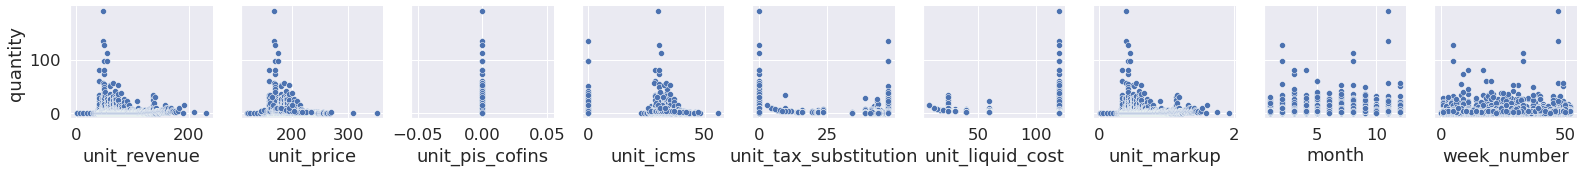

In [18]:
for prod in selected_products: 
    df = df_filtered_sales[df_filtered_sales.code == prod][ unit_cols + ['quantity']].groupby(unit_cols).agg({'quantity':'sum'}).reset_index()

    print(prod)
    ax = sns.pairplot(df[unit_cols + ['quantity']]
                      ,y_vars=['quantity'],x_vars=unit_cols)
    
    plt.show()

* It apears to show some revenue/markup hotspots. 
* there are also a region base for some products when taking account the tax. 